In [1]:
!pip install gradio

     |████████████████████████████████| 2.9 MB 28.8 MB/s 
     |████████████████████████████████| 53 kB 2.4 MB/s 
     |████████████████████████████████| 253 kB 65.6 MB/s 
     |████████████████████████████████| 2.0 MB 32.1 MB/s 
     |████████████████████████████████| 212 kB 53.3 MB/s 
     |████████████████████████████████| 54 kB 3.4 MB/s 
     |████████████████████████████████| 1.1 MB 39.6 MB/s 
     |████████████████████████████████| 84 kB 3.5 MB/s 
     |████████████████████████████████| 144 kB 23.7 MB/s 
     |████████████████████████████████| 271 kB 45.9 MB/s 
     |████████████████████████████████| 94 kB 2.1 MB/s 
     |████████████████████████████████| 10.9 MB 45.4 MB/s 
     |████████████████████████████████| 63 kB 2.4 MB/s 
     |████████████████████████████████| 80 kB 11.7 MB/s 
     |████████████████████████████████| 43 kB 2.5 MB/s 
     |████████████████████████████████| 62 kB 1.1 MB/s 
     |████████████████████████████████| 4.0 MB 46.7 MB/s 
     |██████████████████████

In [2]:
import gradio as gr

/usr/local/lib/python3.7/dist-packages/paramiko/transport.py:236: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [5]:
import pathlib #importing the datm tenserflowet fras
data_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
my_data = tf.keras.utils.get_file('flower_photos', origin=data_url, untar=True)
my_data = pathlib.Path(my_data)

In [8]:
my_data

PosixPath('/root/.keras/datasets/flower_photos')

/root/.keras/datasets/flower_photos/tulips/14149603605_eedfe9678c_n.jpg


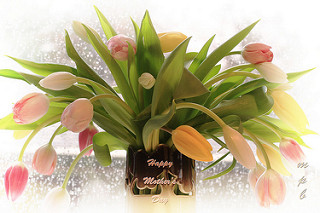

In [10]:
tulips= list(my_data.glob('tulips/*'))
print(tulips[0])
PIL.Image.open(str(tulips[0]))

/root/.keras/datasets/flower_photos/roses/3654988152_b11178bbcb.jpg


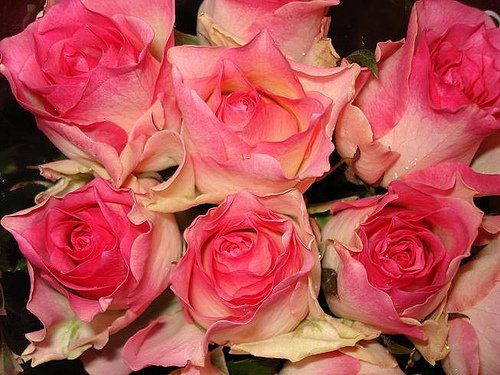

In [6]:
roses = list(my_data.glob('roses/*'))
print(roses[0])
PIL.Image.open(str(roses[0]))

In [20]:
img_hght,img_wdt=180,180 #setting image height and width    
batch_size=32
train_data= tf.keras.preprocessing.image_dataset_from_directory(my_data,        
  validation_split=0.2,#splitting the data 80% as training and 20% as validation
  subset="training",
  seed=123,
  image_size=(img_hght, img_wdt), #tells the image dimensions and batch size
  batch_size=batch_size)


Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [21]:
val_data = tf.keras.preprocessing.image_dataset_from_directory(
  my_data,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_hght, img_wdt),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [23]:
class_names = train_data.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


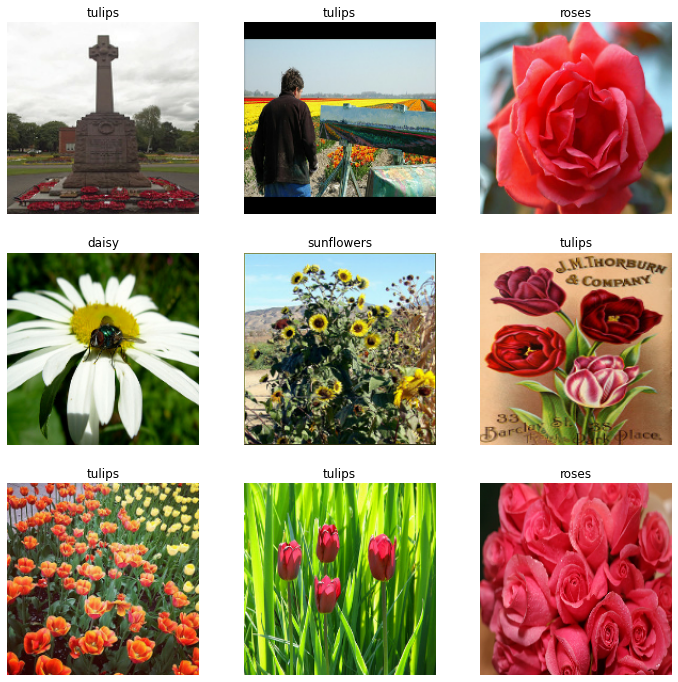

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))
for images, labels in train_data.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [39]:
total_clsas = 5 #deep learning model have 5 classes

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_hght, img_wdt, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),  # 3convolutional neural networks followed by maxpooling layer each
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(total_clsas,activation='softmax') #softmax classification
])

In [34]:
#compiling the model using adam optimizer and SparseCategoricalCrossentropy
model.compile(optimizer='adam',  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [37]:
epochs=10 #training the neural network with all the training data for one cycle.
#Traing the model for 10 epochs
history = model.fit(
    train_data,
  validation_data=val_data,
  epochs=epochs
)

Epoch 1/10
92/92 [==============================] - 89s 959ms/step - loss: 0.5975 - accuracy: 0.7847 - val_loss: 1.0559 - val_accuracy: 0.6308
Epoch 2/10
92/92 [==============================] - 89s 963ms/step - loss: 0.3710 - accuracy: 0.8764 - val_loss: 1.1108 - val_accuracy: 0.6376
Epoch 3/10
92/92 [==============================] - 89s 964ms/step - loss: 0.2294 - accuracy: 0.9244 - val_loss: 1.2708 - val_accuracy: 0.6512
Epoch 4/10
92/92 [==============================] - 89s 967ms/step - loss: 0.1105 - accuracy: 0.9673 - val_loss: 1.4821 - val_accuracy: 0.6635
Epoch 5/10
92/92 [==============================] - 93s 1s/step - loss: 0.1034 - accuracy: 0.9700 - val_loss: 1.6213 - val_accuracy: 0.6608
Epoch 6/10
92/92 [==============================] - 90s 976ms/step - loss: 0.0455 - accuracy: 0.9898 - val_loss: 1.6750 - val_accuracy: 0.6403
Epoch 7/10
92/92 [==============================] - 90s 969ms/step - loss: 0.0398 - accuracy: 0.9918 - val_loss: 1.9284 - val_accuracy: 0.6199
Ep

In [40]:
def predict_image(img):
  img_4d=img.reshape(-1,180,180,3)
  prediction=model.predict(img_4d)[0]
  return {class_names[i]: float(prediction[i]) for i in range(8)}

In [ ]:
image = gr.inputs.Image(shape=(180,180)) #input as input
label = gr.outputs.Label(num_top_classes=5)#output as label

gr.Interface(fn=predict_image, inputs=image, outputs=label,interpretation='default').launch(debug='True')


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://45800.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/gradio/routes.py", line 269, in predict
    output = await run_in_threadpool(app.launchable.process_api, body, username)
  File "/usr/local/lib/python3.7/dist-packages/starlette/concurrency.py", line 41, in run_in_threadpool
    return await anyio.to_thread.run_sync(func, *args)
  File "/usr/local/lib/python3.7/dist-packages/anyio/to_thread.py", line 32, in run_sync
    func, *args, cancellable=cancellable, limiter=limiter
  File "/usr/local/lib/python3.7/dist-packages/anyio/_backends/_asyncio.py", line 937, in run_sync_in_worker_thread
    return await future
  File "/usr/local/lib/python3.7/dist-packages/anyio/_backends/_asyncio.py", line 867, in run
    result = context.run(func, *args)
  File "/usr/local/lib/python3.7/dist-packages/gradio/interface.py", line 573, in process_api
    prediction, durations = self.process(raw_input)
  File "/usr/local/lib/python3.7/dist-packages/gradio/interface.py", line